<a href="https://colab.research.google.com/github/sardarmonsoorsait/mlExamples/blob/master/project_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = "/content/drive/My Drive/house_price_data/Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)

In [5]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df_raw.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df = df_raw.copy()

In [9]:
num_var = df.select_dtypes(include="float64").keys()
num_var

Index(['bath', 'balcony', 'price'], dtype='object')

In [10]:
df[num_var].isnull().sum()

bath        73
balcony    609
price        0
dtype: int64

In [11]:
for val in num_var:
  df[val]=df[val].fillna(df[val].mean())

In [12]:
df[num_var].isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [13]:
cat_var = df.select_dtypes(include="object").keys()
cat_var

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [14]:
df[cat_var].isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
dtype: int64

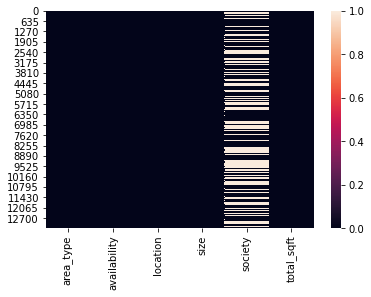

In [15]:
sns.heatmap(df[cat_var].isnull())

In [16]:
df=df.drop('society',axis=1)

In [17]:
cat_var = df.select_dtypes(include="object").keys()
cat_var

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [18]:
#for val in cat_var: 
df2 = df.dropna(axis=0)

In [19]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
df2.shape

(13303, 8)

In [23]:
df_x= df2.drop('price',axis=1)
df_y = df2['price']
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.2)
print('Size of x_train = ',x_train.shape)
print('Size of x_test = ',x_test.shape)
print('Size of y_train = ',y_train.shape)
print('Size of y_test = ',y_test.shape)

Size of x_train =  (10642, 7)
Size of x_test =  (2661, 7)
Size of y_train =  (10642,)
Size of y_test =  (2661,)


In [ ]:
from sklearn.linear_model import LinearRegression
